<a href="https://colab.research.google.com/github/Pymadi369/Pymadi369/blob/main/Boston_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

You are tasked with developing a predictive model to estimate the median value of owner-occupied homes (MEDV) in various neighborhoods of Boston.

Load the Boston Housing dataset from the provided source.

Preprocess the dataset by selecting all the feature as the independent variable (X) and the MEDV as the dependent variable (Y).

Split the dataset into training and testing sets (e.g., 70% for training and 30% for testing) to evaluate the model's performance.

Develop a simple linear regression model using the training data, where you predict MEDV based on ALL THE FACTORS.

Evaluate the model's performance on the testing data using various metrics such as RMSE, MAE, MAPE, R², and Adjusted R².

Visualize the model's predictions by plotting the regression line against the actual data points.

In [4]:
# import the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
#load the dataset
data = pd.read_csv('/content/Boston_Housing.csv')
data


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
data.rename(columns={'ZN': 'Residential_zone', 'INDUS': 'Business_land', 'RM': 'ROOMS', 'AGE': 'Owned_by_owner', 'DIS': 'Distance', 'RAD': 'Highways'}, inplace=True)
print(data)

        CRIM  Residential_zone  Business_land  CHAS    NOX  ROOMS  \
0    0.00632              18.0           2.31   0.0  0.538  6.575   
1    0.02731               0.0           7.07   0.0  0.469  6.421   
2    0.02729               0.0           7.07   0.0  0.469  7.185   
3    0.03237               0.0           2.18   0.0  0.458  6.998   
4    0.06905               0.0           2.18   0.0  0.458  7.147   
..       ...               ...            ...   ...    ...    ...   
501  0.06263               0.0          11.93   0.0  0.573  6.593   
502  0.04527               0.0          11.93   0.0  0.573  6.120   
503  0.06076               0.0          11.93   0.0  0.573  6.976   
504  0.10959               0.0          11.93   0.0  0.573  6.794   
505  0.04741               0.0          11.93   0.0  0.573  6.030   

     Owned_by_owner  Distance  Highways    TAX  PTRATIO       B  LSTAT  MEDV  
0              65.2    4.0900       1.0  296.0     15.3  396.90   4.98  24.0  
1            

In [11]:
data

,CRIM,Residential_zone,Business_land,CHAS,NOX,ROOMS,Owned_by_owner,Distance,Highways,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CRIM              506 non-null    float64
 1   Residential_zone  506 non-null    float64
 2   Business_land     506 non-null    float64
 3   CHAS              506 non-null    float64
 4   NOX               506 non-null    float64
 5   ROOMS             506 non-null    float64
 6   Owned_by_owner    506 non-null    float64
 7   Distance          506 non-null    float64
 8   Highways          506 non-null    float64
 9   TAX               506 non-null    float64
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MEDV              506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
data.isnull().sum()

CRIM                0
Residential_zone    0
Business_land       0
CHAS                0
NOX                 0
ROOMS               0
Owned_by_owner      0
Distance            0
Highways            0
TAX                 0
PTRATIO             0
B                   0
LSTAT               0
MEDV                0
dtype: int64

EDA FOR DATA understanding

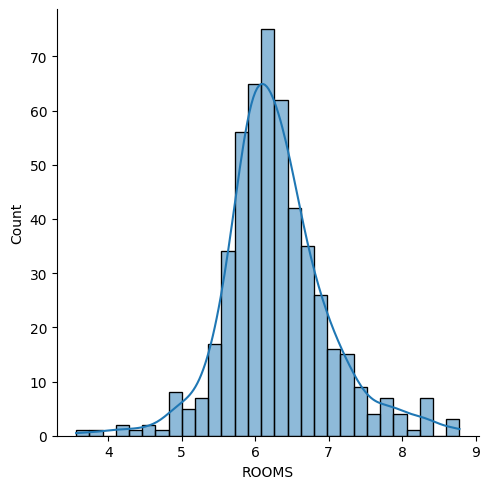

In [14]:
sns.displot(x=data.ROOMS,kde= True)
plt.show()

In [17]:
data.ROOMS.skew()

0.40361213328874385

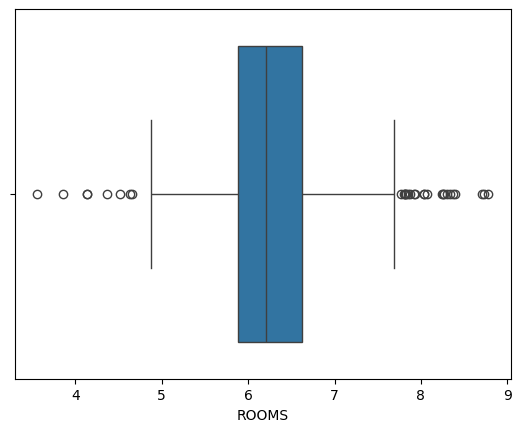

In [18]:
sns.boxplot(x=data.ROOMS)
plt.show()

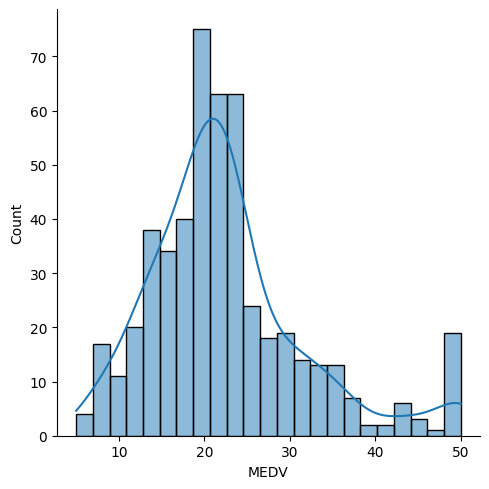

In [22]:
#DISTRIBUTION OF THE DEPENDENT variable
sns.displot(x=data.MEDV,kde= True)
plt.show()

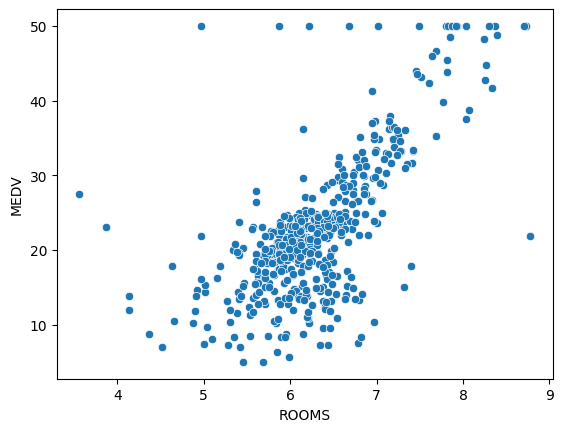

In [26]:
# biivariate analysis
sns.scatterplot(x=data.ROOMS,y=data.MEDV)
plt.show()

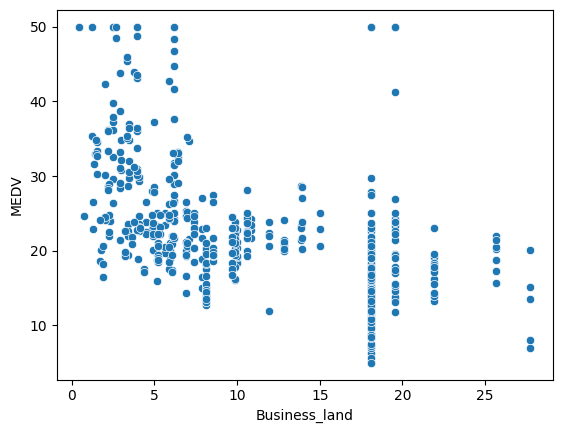

In [27]:
#split the data into x and y
sns.scatterplot(x=data.Business_land,y=data.MEDV)
plt.show()

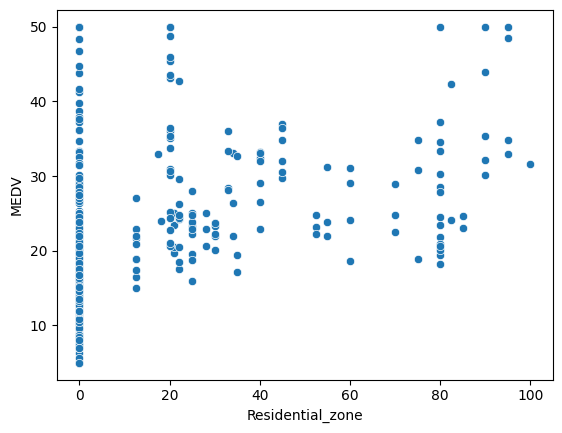

In [29]:
sns.scatterplot(x=data.Residential_zone,y=data.MEDV)
plt.show()

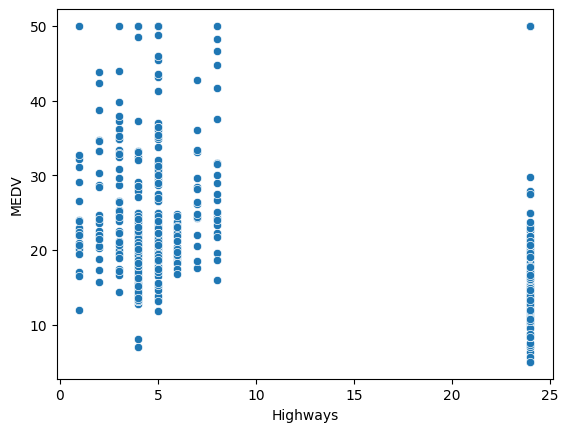

In [31]:
sns.scatterplot(y=data.MEDV,x=data.Highways)
plt.show()

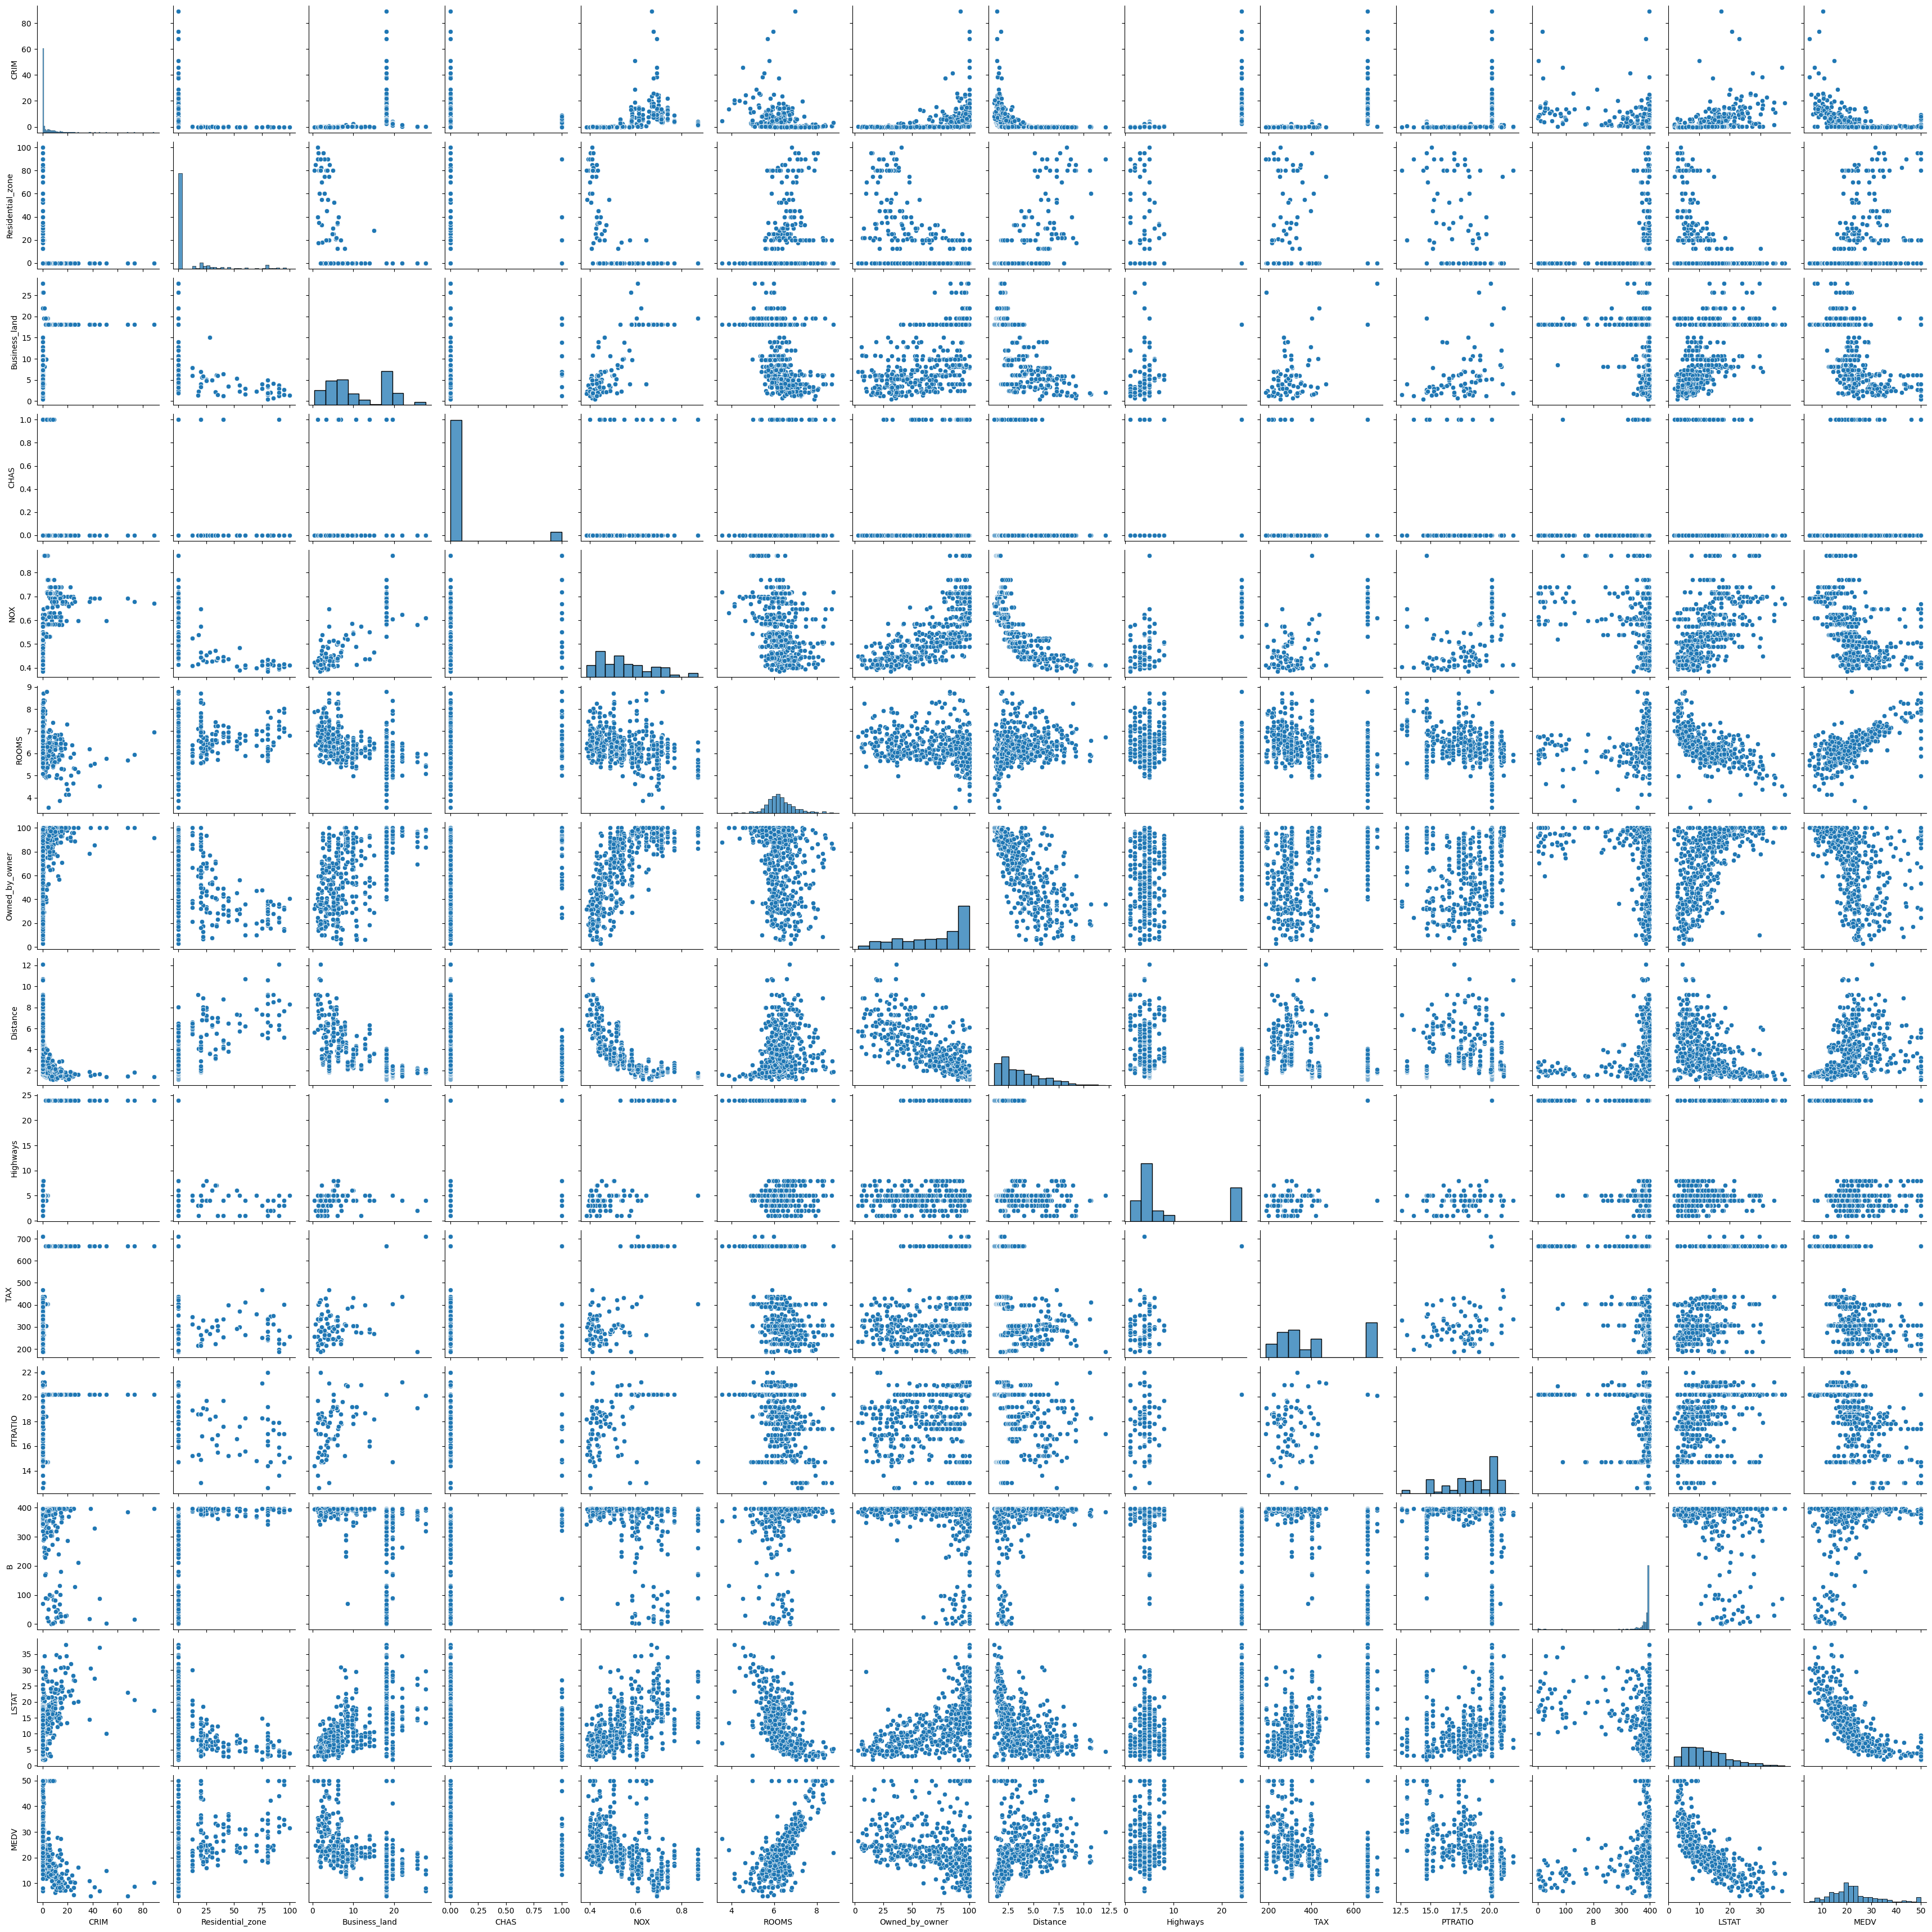

In [32]:
sns.pairplot(data)

Split the data into X and Y

In [34]:
# split the data into x and y
X = data.drop('MEDV',axis=1)
Y = data.MEDV

In [37]:
#import the scikit learn library and SPLIT the data for trainig and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y ,test_size = 0.3,random_state=42)

In [39]:
print("X_train",X_train.shape)
print('X_test',X_test.shape)
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)

X_train (354, 13)
X_test (152, 13)
Y_train (354,)
Y_test (152,)


In [40]:
#LINEAR regression model
from sklearn.linear_model import LinearRegression
#initisalise the model
linear_model = LinearRegression()
#train the model
linear_model.fit(X_train,Y_train)
#predict the model
y_pred = linear_model.predict(X_test)

In [41]:
y_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [42]:
Y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: MEDV, Length: 152, dtype: float64

In [60]:
pd.DataFrame(y_pred,Y_test)

,0
MEDV,
23.6,28.648960
32.4,36.495014
13.6,15.411193
22.8,25.403213
16.1,18.855280
...,...
17.1,17.403672
14.5,13.385941
50.0,39.983425


In [55]:
data

,CRIM,Residential_zone,Business_land,CHAS,NOX,ROOMS,Owned_by_owner,Distance,Highways,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [47]:
linear_model.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [48]:
linear_model.intercept_

31.631084035693327

In [74]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred,Y_test)
print('mean squared error', mse)


mean squared error 19.646250145928036


In [84]:
linear_model = LinearRegression()
linear_model.fit(X,Y)

# Make predictions
y_pred = linear_model.predict(X_test)

# Calculate residuals (difference between predicted and actual values)
residuals = Y_test - y_pred

# Identify outliers using a threshold (e.g., 3 standard deviations from the mean)
threshold = 3 * np.std(residuals)
outliers = np.abs(residuals) > threshold

# Remove outliers from the dataset
X_test_clean = X_test[outliers]
Y_test_clean = Y_test[outliers]
y_pred_clean = y_pred[outliers]

# Refit the model with cleaned data
linear_model.fit(X_test_clean, Y_test_clean)

# Make predictions with the cleaned model
y_pred_clean = linear_model.predict(X_test_clean)

# Evaluate model performance with mean squared error
mse_clean = mean_squared_error(Y_test_clean, y_pred_clean)
print("Mean Squared Error after handling outliers:", mse_clean)
rmse = np.sqrt(mse_clean)
print("Mean Squared Error after handling outliers:", rmse)

Mean Squared Error after handling outliers: 1.5777218104420236e-28
Mean Squared Error after handling outliers: 1.2560739669470201e-14


In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MAE = mean_absolute_error(Y_test_clean,y_pred_clean)
print('Mean Absolute Error AFTER HANDLING OUTLIERS is',MAE)

Mean Absolute Error AFTER HANDLING OUTLIERS is 1.2434497875801753e-14


In [88]:
r2 = r2_score(Y_test, y_pred)
print('Rsquare Error AFTER HANDLING OUTLIERS is',r2)


Rsquare Error AFTER HANDLING OUTLIERS is 0.7363382906561156
